In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

> The bug hunter dataset contains bug information at file, class and method level, we are interested more on the method level to have a more specific portion of code identified as buggy. In addition, this dataset was divided between full, gcf, remove, single and subtract sections. Each section represents a strategy to balance the data (between buggy and non-buggy ocurrences). For now we are going to focus on "subtract", which tries to have a 50% for both types of classification.

In [7]:
df1 = pd.read_csv('./bug-hunter/BugHunterDataset-1.0/subtract/all/method.csv')
print(df1.shape)
df1.head()

(108106, 76)


,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,HEFF,HNDB,HPL,HPV,HTRP,HVOL,MI,MIMS,MISEI,MISM,McCC,NL,NLE,NII,NOI,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,WarningBlocker,WarningCritical,WarningInfo,WarningMajor,WarningMinor,Android Rules,Basic Rules,Brace Rules,Clone Implementation Rules,Code Size Rules,Comment Rules,Controversial Rules,Coupling Rules,Design Rules,Empty Code Rules,Finalizer Rules,Import Statement Rules,J2EE Rules,JUnit Rules,Jakarta Commons Logging Rules,Java Logging Rules,JavaBean Rules,MigratingToJUnit4 Rules,Migration Rules,Migration13 Rules,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,elasticsearch,4d05c9cfd5cc889be77ec16730517d5417438e92,org.elasticsearch.index.fielddata.plain.GeoPoi...,0.0,0,0,0,0.0,0.0,0,0,10.0,1.0,15.5098,6.21924,6,6,0.861654,15.5098,138.717,81.1210,124.527,72.8228,1,0,0,0,1,0.0,0,0,0.0,0,3,3,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,titan,8ed7a34830b0a78e03142c2f4be6ea9d63b30fa8,com.thinkaurelius.titan.graphdb.idmanagement.I...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,130.441,76.2816,112.588,65.8411,1,0,0,0,0,0.0,0,0,0.0,0,5,5,1,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,neo4j,0ee64611da3ec59a112900276491b100b8b8cc59,org.neo4j.kernel.impl.locking.ReadOnlyLocks.ac...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['Project', 'Hash', 'LongName', 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC',
       'LDC', 'LLDC', 'HCPL', 'HDIF', 'HEFF', 'HNDB', 'HPL', 'HPV', 'HTRP',
       'HVOL', 'MI', 'MIMS', 'MISEI', 'MISM', 'McCC', 'NL', 'NLE', 'NII',
       'NOI', 'CD', 'CLOC', 'DLOC', 'TCD', 'TCLOC', 'LLOC', 'LOC', 'NOS',
       'NUMPAR', 'TLLOC', 'TLOC', 'TNOS', 'WarningBlocker', 'WarningCritical',
       'WarningInfo', 'WarningMajor', 'WarningMinor', 'Android Rules',
       'Basic Rules', 'Brace Rules', 'Clone Implementation Rules',
       'Code Size Rules', 'Comment Rules', 'Controversial Rules',
       'Coupling Rules', 'Design Rules', 'Empty Code Rules', 'Finalizer Rules',
       'Import Statement Rules', 'J2EE Rules', 'JUnit Rules',
       'Jakarta Commons Logging Rules', 'Java Logging Rules', 'JavaBean Rules',
       'MigratingToJUnit4 Rules', 'Migration Rules', 'Migration13 Rules',
       'Migration14 Rules', 'Migration15 Rules', 'Naming Rules',
       'Optimization Rules', 'Security Code Guideline

Check null values

In [53]:
df1.isnull().sum()

Project                              0
Hash                                 0
LongName                             0
CC                                   0
CCL                                  0
                                    ..
String and StringBuffer Rules        0
Type Resolution Rules                0
Unnecessary and Unused Code Rules    0
Vulnerability Rules                  0
Number of Bugs                       0
Length: 76, dtype: int64

> I want to see the distribution of values for the numerical values

In [20]:
numerical_df1 = df1.select_dtypes(include=[np.number])
len(numerical_df1.columns)

73

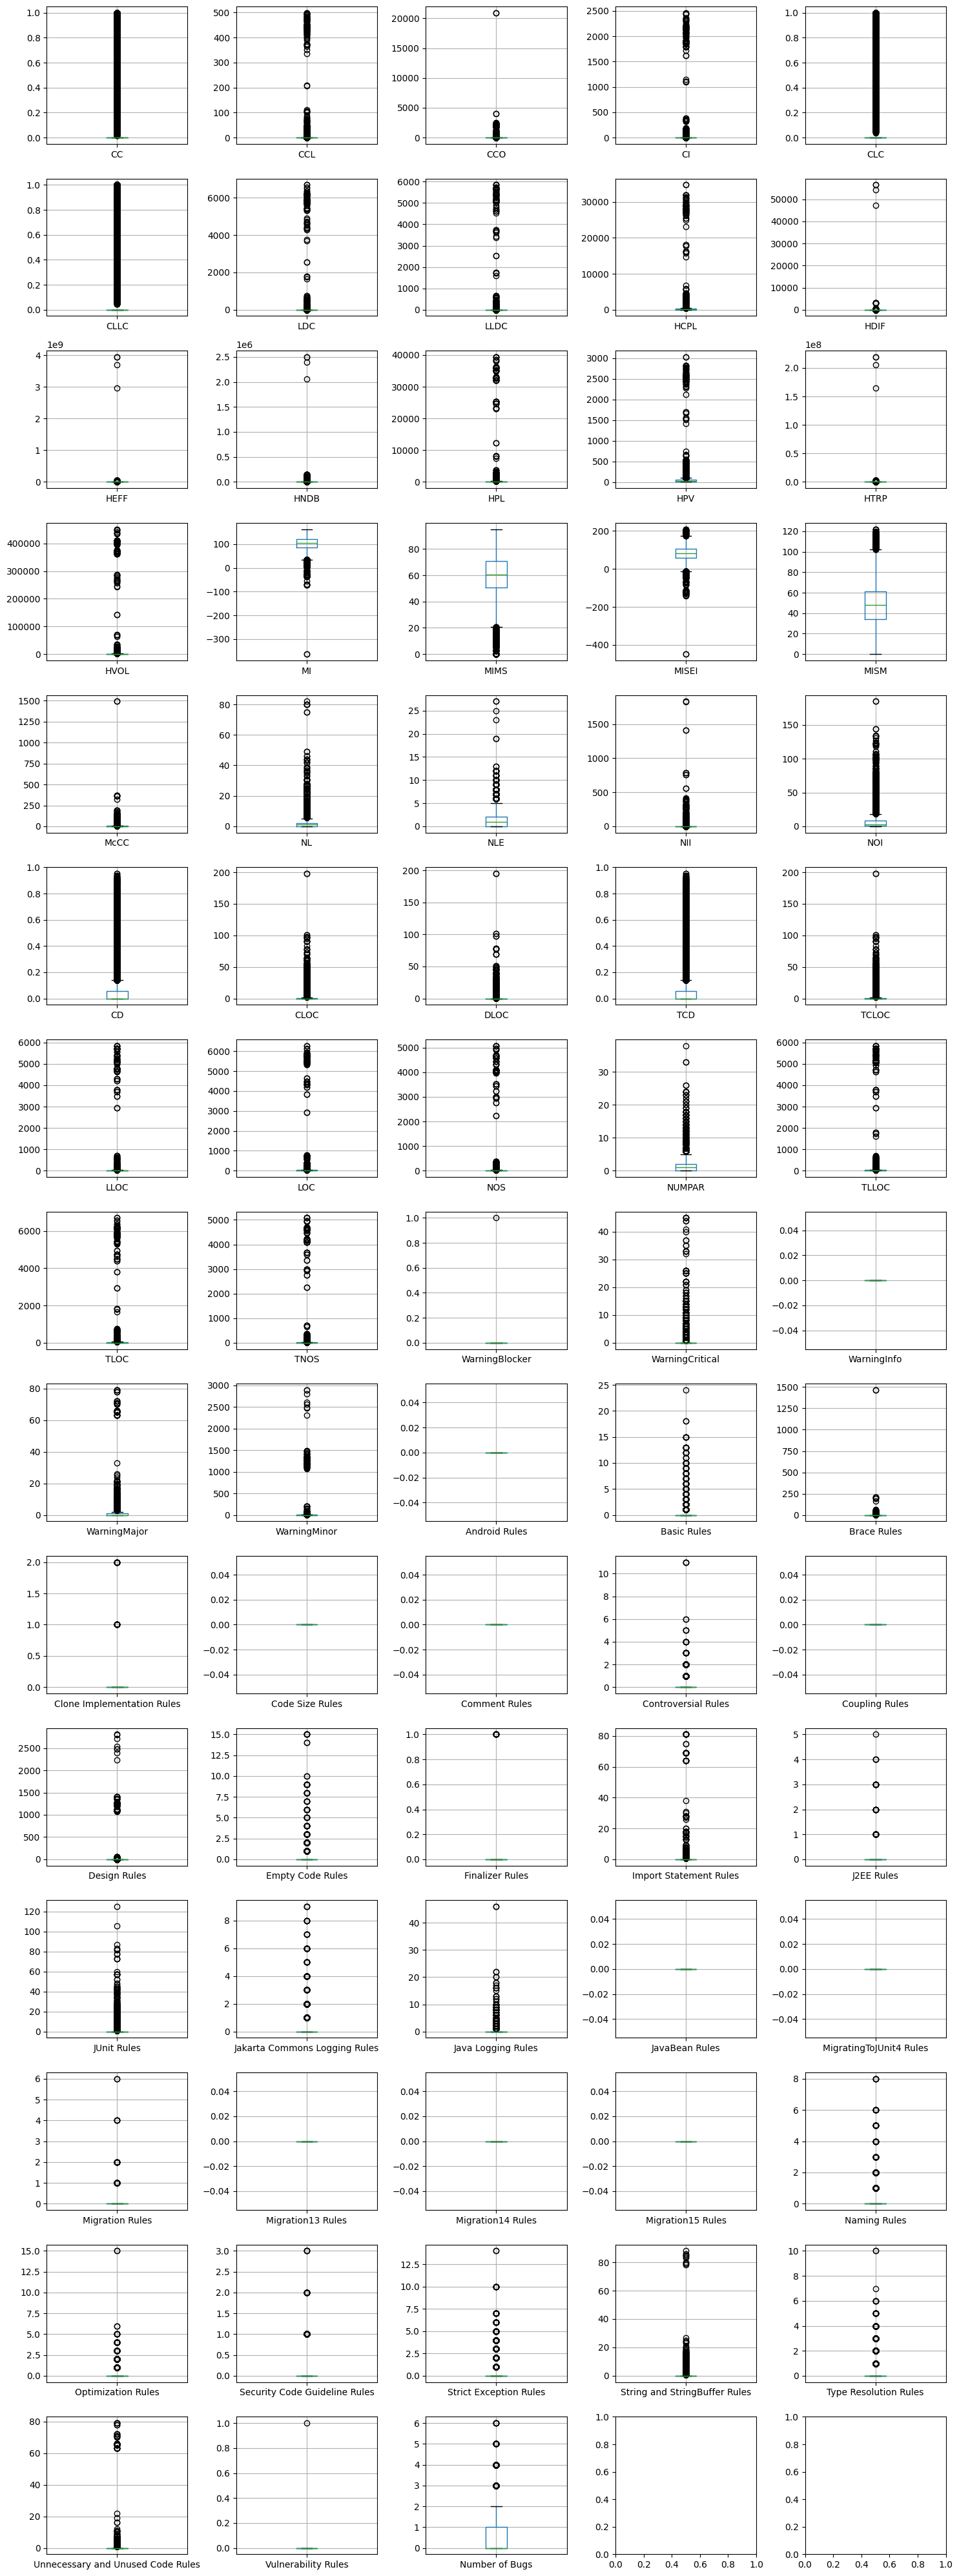

In [ ]:
rows = 15
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 40))

axes = axes.flatten()

for i, column in enumerate(numerical_df1.columns):
    numerical_df1.boxplot(column=column, ax=axes[i], vert=True)
    
plt.tight_layout()

plt.show()

In [37]:
columns_to_check = ['WarningBlocker', 'WarningInfo', 'Android Rules', 'Clone Implementation Rules', 
                    'Code Size Rules', 'Comment Rules', 'Coupling Rules', 'Finalizer Rules', 'J2EE Rules', 
                    'JavaBean Rules', 'MigratingToJUnit4 Rules', 'Migration Rules', 'Migration13 Rules', 
                    'Migration14 Rules', 'Migration15 Rules', 'Naming Rules', 'Vulnerability Rules', 
                    'Controversial Rules', 'Empty Code Rules', 'Basic Rules', 'Jakarta Commons Logging Rules', 
                    'Optimization Rules', 'Security Code Guideline Rules', 'Strict Exception Rules',
                      'Type Resolution Rules']

for column in columns_to_check:
    print(df1[column].value_counts())
    print("\n")

WarningBlocker
0    108105
1         1
Name: count, dtype: int64


WarningInfo
0    108106
Name: count, dtype: int64


Android Rules
0    108106
Name: count, dtype: int64


Clone Implementation Rules
0    108077
1        19
2        10
Name: count, dtype: int64


Code Size Rules
0    108106
Name: count, dtype: int64


Comment Rules
0    108106
Name: count, dtype: int64


Coupling Rules
0    108106
Name: count, dtype: int64


Finalizer Rules
0    108090
1        16
Name: count, dtype: int64


J2EE Rules
0    108057
1        25
2        10
3        10
4         3
5         1
Name: count, dtype: int64


JavaBean Rules
0    108106
Name: count, dtype: int64


MigratingToJUnit4 Rules
0    108106
Name: count, dtype: int64


Migration Rules
0    108027
1        58
2        15
4         4
6         2
Name: count, dtype: int64


Migration13 Rules
0    108106
Name: count, dtype: int64


Migration14 Rules
0    108106
Name: count, dtype: int64


Migration15 Rules
0    108106
Name: count, dtype: int

> We can see that the following columns don't contain useful information:
* WarningBlocker
* WarningInfo
* Android Rules
* Clone Implementation Rules
* Code Size Rules
* Comment Rules
* Coupling Rules
* Finalizer Rules
* J2EE Rules
* JavaBean Rules
* MigratingToJUnit4 Rules
* Migration Rules
* Migration13 Rules
* Migration14 Rules
* Migration15 Rules
* Vulnerability Rules
* Empty Code Rules
* Basic Rules
* Jakarta Commons Logging Rules
* Optimization Rules
* Security Code Guideline Rules

In [38]:
df2 = df1.drop(columns=['WarningBlocker', 'WarningInfo', 'Android Rules', 'Clone Implementation Rules', 
                    'Code Size Rules', 'Comment Rules', 'Coupling Rules', 'Finalizer Rules', 'J2EE Rules', 
                    'JavaBean Rules', 'MigratingToJUnit4 Rules', 'Migration Rules', 'Migration13 Rules', 
                    'Migration14 Rules', 'Migration15 Rules', 'Vulnerability Rules', 
                    'Controversial Rules', 'Basic Rules', 'Jakarta Commons Logging Rules', 
                    'Optimization Rules', 'Security Code Guideline Rules'])
df2.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,HEFF,HNDB,HPL,HPV,HTRP,HVOL,MI,MIMS,MISEI,MISM,McCC,NL,NLE,NII,NOI,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,WarningCritical,WarningMajor,WarningMinor,Brace Rules,Design Rules,Empty Code Rules,Import Statement Rules,JUnit Rules,Java Logging Rules,Naming Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
0,elasticsearch,4d05c9cfd5cc889be77ec16730517d5417438e92,org.elasticsearch.index.fielddata.plain.GeoPoi...,0.0,0,0,0,0.0,0.0,0,0,10.0,1.0,15.5098,6.21924,6,6,0.861654,15.5098,138.717,81.1210,124.527,72.8228,1,0,0,0,1,0.0,0,0,0.0,0,3,3,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,titan,8ed7a34830b0a78e03142c2f4be6ea9d63b30fa8,com.thinkaurelius.titan.graphdb.idmanagement.I...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,130.441,76.2816,112.588,65.8411,1,0,0,0,0,0.0,0,0,0.0,0,5,5,1,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,neo4j,0ee64611da3ec59a112900276491b100b8b8cc59,org.neo4j.kernel.impl.locking.ReadOnlyLocks.ac...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,0.0,0.0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,0,0.0,0,4,4,0,1,4,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


I want to check also the data distribution

In [39]:
numerical_df2 = df2.select_dtypes(include=[np.number])
len(numerical_df2.columns)

52

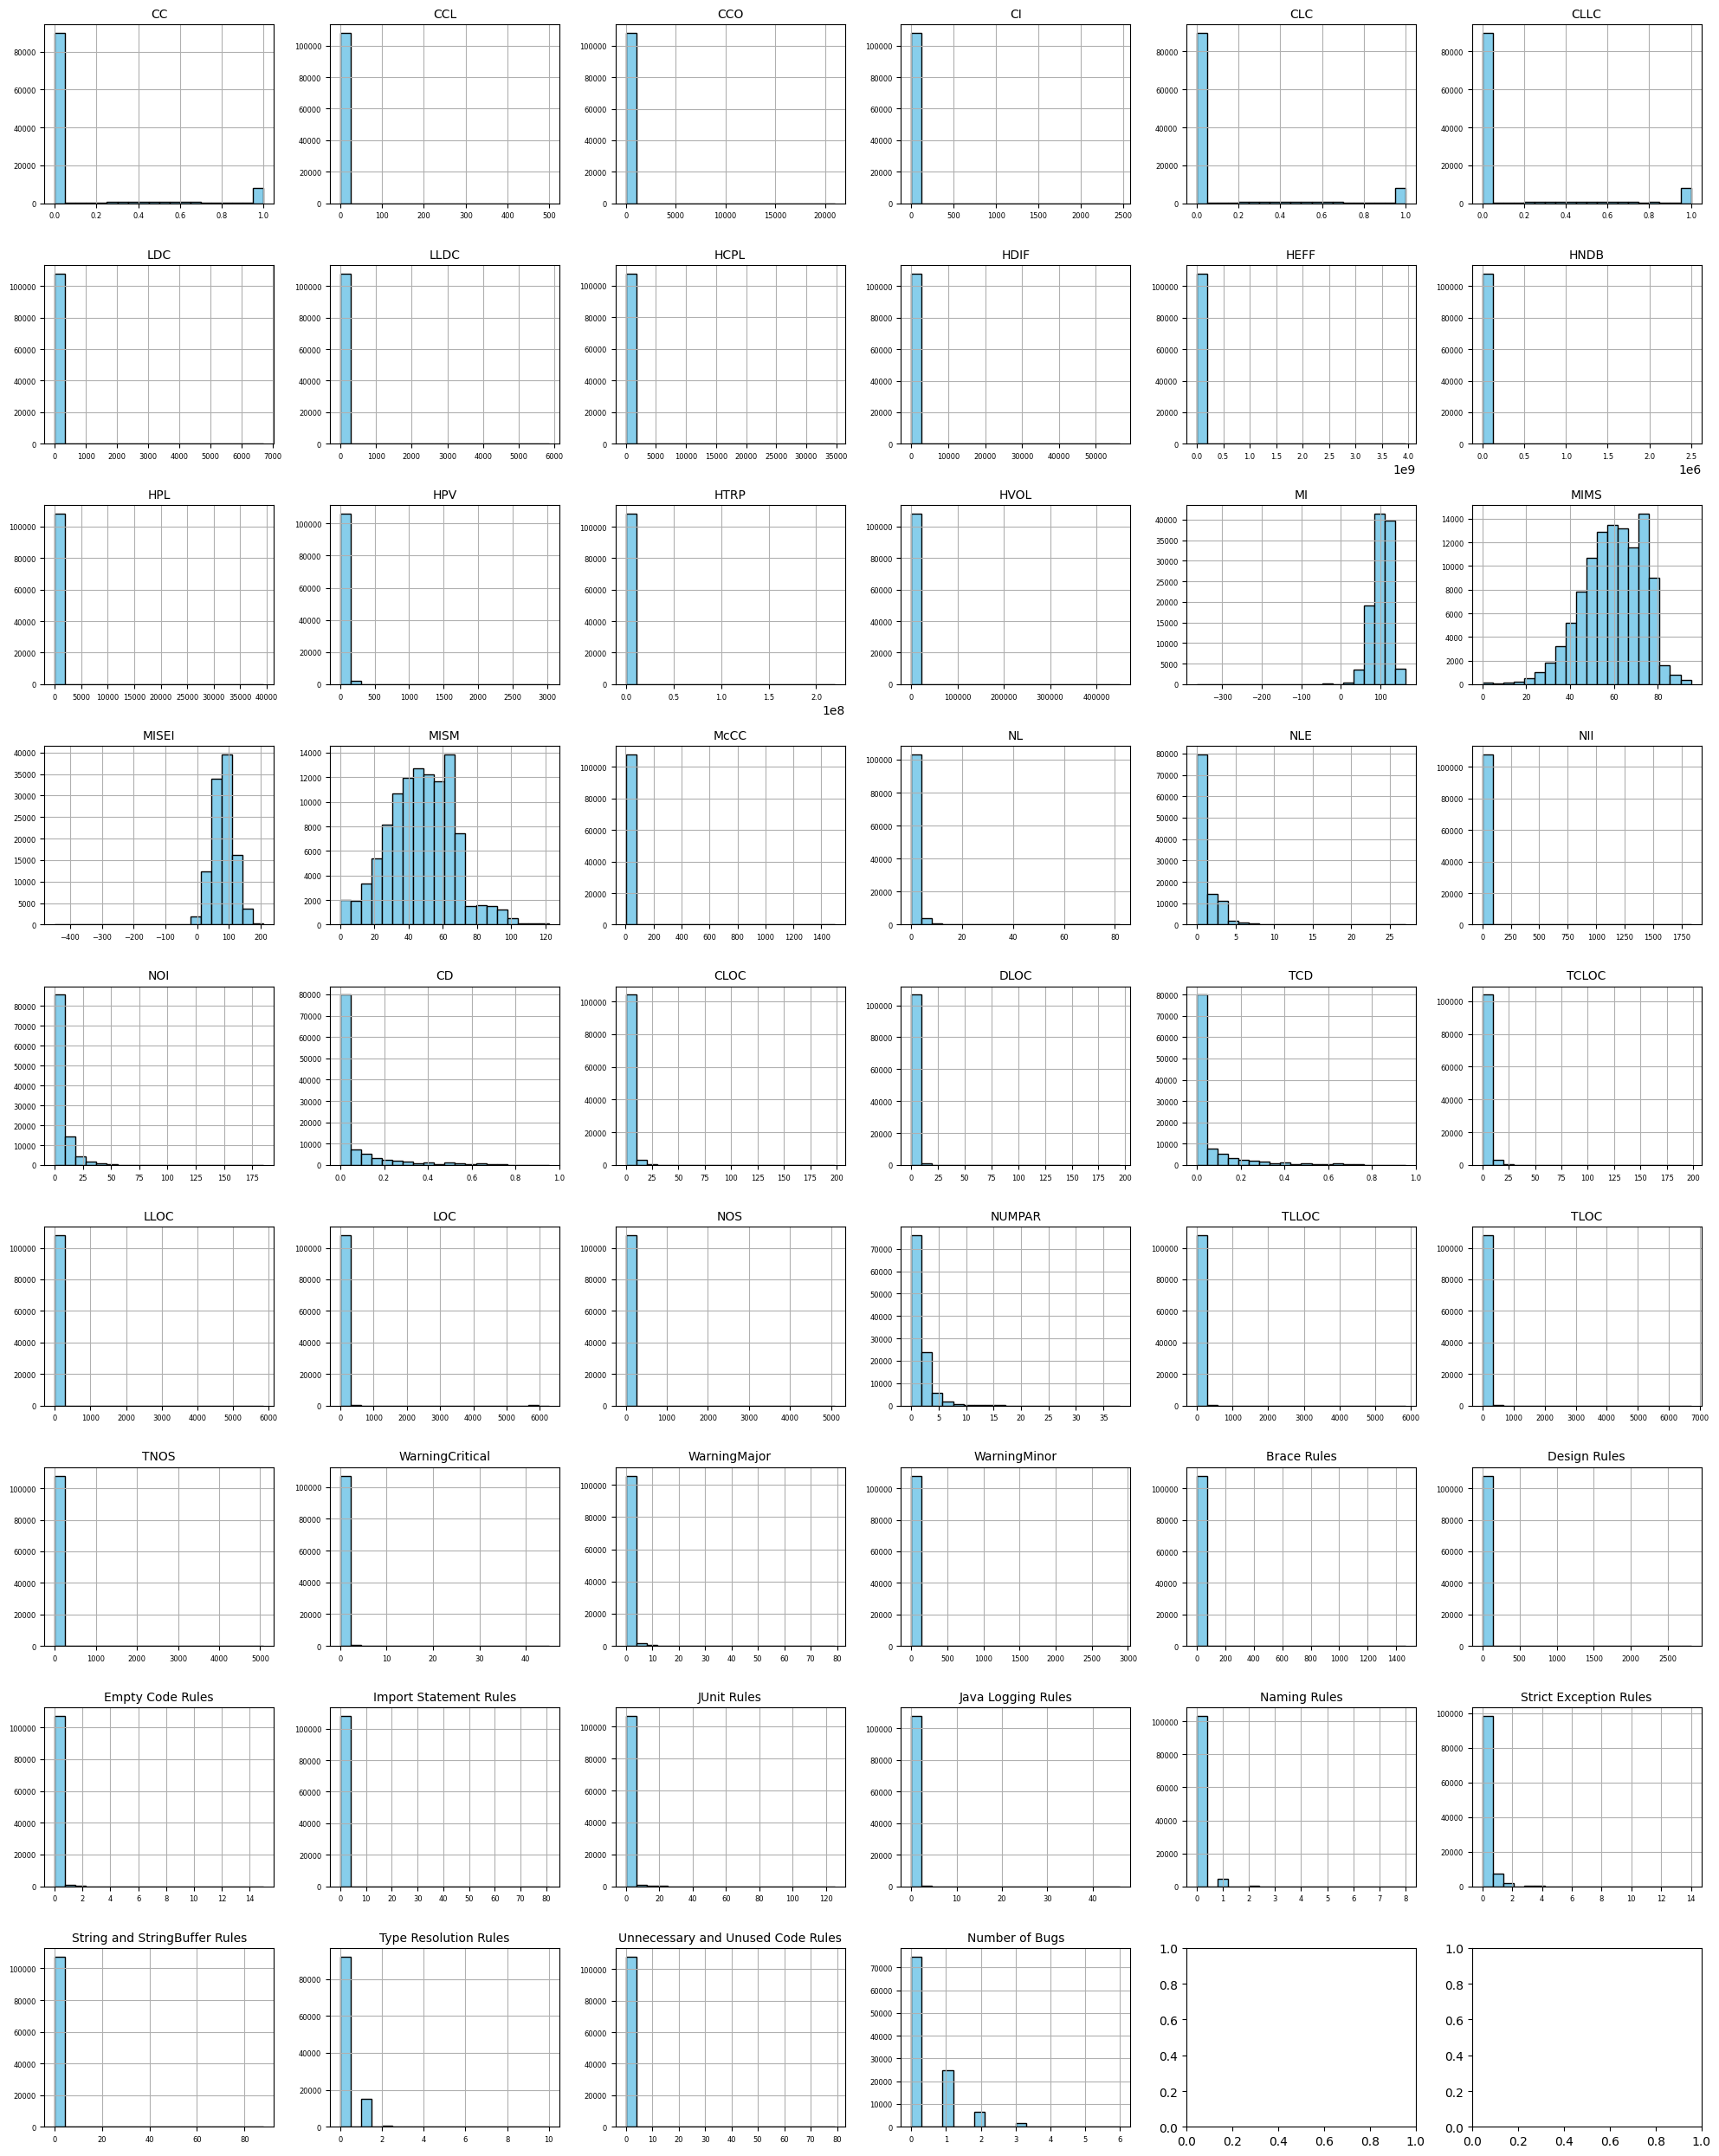

In [48]:
rows = 9
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(20, 25))

axes = axes.flatten()

for i, column in enumerate(numerical_df2.columns):
    if i < len(axes):
        numerical_df2[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{column}', fontsize=10)
        axes[i].tick_params(axis='x', labelsize=6)
        axes[i].tick_params(axis='y', labelsize=6)
    else:
        axes[i].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.tight_layout()
plt.show()

Those with non-normal distribution need to be checked for the correlation with the target attribute (if relation is linear = Pearson)

In [57]:
columns_to_check = numerical_df2.drop(columns=['Number of Bugs']).columns

for column in columns_to_check:
    correlation = df2[column].corr(df2['Number of Bugs'])
    print(f"{column} correlation: {correlation}")


CC correlation: 0.04181617327396002
CCL correlation: 0.00844971732547663
CCO correlation: 0.0048138674625940354
CI correlation: 0.0049966675145417605
CLC correlation: 0.04135211963607983
CLLC correlation: 0.04166834211899768
LDC correlation: 0.007877057483988677
LLDC correlation: 0.007952912224951154
HCPL correlation: 0.04232971037891818
HDIF correlation: 0.009599670915387229
HEFF correlation: -0.000717487828779592
HNDB correlation: 0.009772985214564659
HPL correlation: 0.022815736376582494
HPV correlation: 0.07055415612052778
HTRP correlation: -0.0007174893529380814
HVOL correlation: 0.015176273456028441
MI correlation: -0.1700466755104052
MIMS correlation: -0.17156230338295578
MISEI correlation: -0.15894625401408716
MISM correlation: -0.16165808436438556
McCC correlation: 0.05171954916533784
NL correlation: 0.09290330985226918
NLE correlation: 0.10320261724190438
NII correlation: 0.015453388228199263
NOI correlation: 0.1311355507670652
CD correlation: -0.007413792898204663
CLOC corre

These results are showing that the relation is not linear with the target attribute, so we will try with non-linear = Spearman

In [ ]:
correlation_dict = {}
for column in columns_to_check:
    correlation = df2[column].corr(df2['Number of Bugs'], method='spearman')
    correlation_dict[column] = correlation
correlation_dict

{'CC': 0.06136230454059651,
 'CCL': 0.06694744762649583,
 'CCO': 0.06813544084175253,
 'CI': 0.06730639579782857,
 'CLC': 0.06126201172392747,
 'CLLC': 0.061275314993592164,
 'LDC': 0.06791391662037373,
 'LLDC': 0.06824083577088114,
 'HCPL': 0.21038732148930905,
 'HDIF': 0.20035676546377318,
 'HEFF': 0.20680216383760058,
 'HNDB': 0.20680223636262748,
 'HPL': 0.20663823736115616,
 'HPV': 0.2104536348369557,
 'HTRP': 0.20680223243143941,
 'HVOL': 0.20754836431652735,
 'MI': -0.20084109070903367,
 'MIMS': -0.2008411634824569,
 'MISEI': -0.19003330324151715,
 'MISM': -0.19003294779586788,
 'McCC': 0.14032767090377982,
 'NL': 0.13864707217035963,
 'NLE': 0.13771524991105924,
 'NII': 0.015445962000151756,
 'NOI': 0.19849660813749123,
 'CD': 0.04668293462153589,
 'CLOC': 0.059416680768761145,
 'DLOC': 0.003449441943223756,
 'TCD': 0.047792958444156125,
 'TCLOC': 0.06120773824621321,
 'LLOC': 0.1926672078808076,
 'LOC': 0.19056411077129945,
 'NOS': 0.19452331708477133,
 'NUMPAR': 0.03147751285

In [62]:
# Lets order these results
squared_dict = {column: value**2 for column, value in correlation_dict.items()}
sorted_columns = sorted(squared_dict, key=squared_dict.get, reverse=False)
sorted_correlation_dict = {column: correlation_dict[column] for column in sorted_columns}

sorted_correlation_dict

{'DLOC': 0.003449441943223756,
 'Brace Rules': 0.0096507587074126,
 'Naming Rules': -0.015256466417659879,
 'NII': 0.015445962000151756,
 'Unnecessary and Unused Code Rules': 0.017901918131780752,
 'Empty Code Rules': 0.01791848529129107,
 'Import Statement Rules': 0.022993479566127198,
 'Java Logging Rules': 0.030403815463397984,
 'NUMPAR': 0.031477512852933154,
 'JUnit Rules': 0.03236101120872548,
 'String and StringBuffer Rules': 0.03518310828941451,
 'CD': 0.04668293462153589,
 'TCD': 0.047792958444156125,
 'Type Resolution Rules': 0.05258663773099887,
 'WarningCritical': 0.05589767934370659,
 'CLOC': 0.059416680768761145,
 'TCLOC': 0.06120773824621321,
 'CLC': 0.06126201172392747,
 'CLLC': 0.061275314993592164,
 'CC': 0.06136230454059651,
 'Strict Exception Rules': 0.0625646206376091,
 'CCL': 0.06694744762649583,
 'CI': 0.06730639579782857,
 'LDC': 0.06791391662037373,
 'CCO': 0.06813544084175253,
 'LLDC': 0.06824083577088114,
 'WarningMinor': 0.08002852850623567,
 'Design Rules':

* DLOC---> Low correlation and non-significant, therefore __will be removed__
* Brace Rules---> Low correlation and non-significant, therefore __will be removed__
* Naming Rules---> Low correlation and non-significant, therefore __will be removed__
* Unnecessary and Unused Code Rules---> Low correlation and non-significant, therefore __will be removed__
* Empty Code Rules---> Low correlation and non-significant, therefore __will be removed__
* Import Statement Rules---> Low correlation and non-significant, therefore __will be removed__
* Java Logging Rules---> Low correlation and non-significant, therefore __will be removed__
* JUnit Rules---> Low correlation and non-significant, therefore __will be removed__
* String and StringBuffer Rules---> Low correlation and non-significant, therefore __will be removed__
* TCD---> Low correlation and non-significant, therefore __will be removed__
* Type Resolution Rules---> Low correlation and non-significant, therefore __will be removed__
* WarningCritical---> Low correlation and non-significant, therefore __will be removed__
* TCLOC---> Low correlation and non-significant, therefore __will be removed__
* CLC---> Low correlation and non-significant, therefore __will be removed__
* CLLC---> Low correlation and non-significant, therefore __will be removed__
* Strict Exception Rules---> Low correlation and non-significant, therefore __will be removed__
* CCL---> Low correlation and non-significant, therefore __will be removed__
* CCO---> Low correlation and non-significant, therefore __will be removed__
* WarningMinor---> Low correlation and non-significant, therefore __will be removed__
* Design Rules---> Low correlation and non-significant, therefore __will be removed__
* WarningMajor---> Low correlation and non-significant, therefore __will be removed__

In [68]:
df3 = df2.drop(columns=['DLOC', 'Brace Rules', 'Naming Rules', 'Unnecessary and Unused Code Rules', 
                        'Empty Code Rules', 'Import Statement Rules', 'Java Logging Rules', 
                        'JUnit Rules', 'String and StringBuffer Rules', 'TCD', 'Type Resolution Rules', 
                        'WarningCritical', 'TCLOC', 'CLC', 'CLLC', 'Strict Exception Rules', 
                        'CCL', 'CCO', 'WarningMinor', 'Design Rules', 'WarningMajor'])
df3.head()

,Project,Hash,LongName,CC,CI,LDC,LLDC,HCPL,HDIF,HEFF,HNDB,HPL,HPV,HTRP,HVOL,MI,MIMS,MISEI,MISM,McCC,NL,NLE,NII,NOI,CD,CLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,Number of Bugs
0,elasticsearch,4d05c9cfd5cc889be77ec16730517d5417438e92,org.elasticsearch.index.fielddata.plain.GeoPoi...,0.0,0,0,0,10.0,1.0,15.5098,6.21924,6,6,0.861654,15.5098,138.717,81.1210,124.527,72.8228,1,0,0,0,1,0.0,0,3,3,1,0,3,3,1,1
1,titan,8ed7a34830b0a78e03142c2f4be6ea9d63b30fa8,com.thinkaurelius.titan.graphdb.idmanagement.I...,0.0,0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,130.441,76.2816,112.588,65.8411,1,0,0,0,0,0.0,0,5,5,1,0,5,5,1,0
2,neo4j,0ee64611da3ec59a112900276491b100b8b8cc59,org.neo4j.kernel.impl.locking.ReadOnlyLocks.ac...,0.0,0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,4,4,0,1,4,4,0,0
3,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,4,4,0,1,4,4,0,0
4,neo4j,1c6e22fad95ec037f0b9c6fd7a9fadb18e8384d1,org.neo4j.server.rest.transactional.integratio...,0.0,0,0,0,10.0,2.0,31.0195,9.87242,6,6,1.723310,15.5098,134.056,78.3955,117.803,68.8909,1,0,0,0,0,0.0,0,4,4,0,1,4,4,0,0


Now we can check the distribution of the information based on the class name

In [ ]:
pd.set_option('display.max_rows', None)

print(df3['LongName'].value_counts())

pd.reset_option('display.max_rows')

In [76]:
df3[df3['LongName'] == 'org.mapdb.StoreWAL.replayWAL()V']

,Project,Hash,LongName,CC,CI,LDC,LLDC,HCPL,HDIF,HEFF,HNDB,HPL,HPV,HTRP,HVOL,MI,MIMS,MISEI,MISM,McCC,NL,NLE,NII,NOI,CD,CLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,Number of Bugs
65266,MapDB,4f2fc75ae2e3b4a9324acf0a823d7cbd5a689e08,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,508.982,67.1000,102618.0,2191.88,235,91,5701.01,1529.33,67.7382,39.6130,59.6410,34.8778,12,5,4,10,15,0.276923,18,47,70,37,0,47,70,37,0
75150,MapDB,41e3e8059121314a64ef32611bad68ab176b8a8f,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,657.687,61.4035,170445.0,3074.13,407,113,9469.15,2775.81,58.3112,34.1001,36.6619,21.4397,20,8,4,10,14,0.126761,9,62,74,54,0,62,74,54,2
75778,MapDB,5e2cb5ecf8bae2e996aac82ed81ca4c73468c1d1,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,664.949,63.0000,177354.0,3156.66,412,114,9853.03,2815.15,57.9788,33.9057,36.0185,21.0634,20,8,4,10,15,0.125000,9,63,75,55,0,63,75,55,1
82136,MapDB,72649e80593c3f1fa476c951397a2c9dca467a9c,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,799.262,86.1207,316074.0,4640.09,521,132,17559.70,3670.13,49.3782,28.8761,34.0289,19.8999,21,5,4,10,20,0.276119,37,97,150,77,0,97,150,77,1
82238,MapDB,00a8930ff0dbd0cf3cc9520013037706899b867d,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,806.576,85.2881,314104.0,4620.79,522,133,17450.20,3682.86,49.3602,28.8656,34.0029,19.8847,21,5,4,10,20,0.276119,37,97,150,77,0,97,150,77,0
83282,MapDB,0db6f55c4fd015a1b3a54c7163664d582a8a87d8,org.mapdb.StoreWAL.replayWAL()V,0.000000,0,0,0,828.660,82.9516,309244.0,4573.00,526,136,17180.20,3728.01,49.2968,28.8285,33.9115,19.8313,21,5,4,10,20,0.276119,37,97,150,77,0,97,150,77,1
89815,MapDB,46a2e9543526d5010559fb4d951465ecc2289873,org.mapdb.StoreWAL.replayWAL()V,0.062631,1,10,6,776.395,82.6293,300674.0,4488.11,519,129,16704.10,3638.83,49.4227,28.9022,34.3621,20.0948,21,5,4,10,19,0.281481,38,97,151,77,0,97,151,77,1
89827,MapDB,0f50921e0ef3d536569b31c370ba8d66c744bde7,org.mapdb.StoreWAL.replayWAL()V,0.064516,1,10,6,761.844,84.3125,297563.0,4457.10,505,127,16531.30,3529.29,49.9192,29.1925,35.2872,20.6358,21,5,4,10,19,0.285714,38,95,149,75,0,95,149,75,3


> Note: In this case the method org.mapdb.StoreWAL.replayWAL()V in project MapDB, has 8 records, 6 contains bugs and 2 are bug free. Probably I need to create a binary column of the number of bugs???